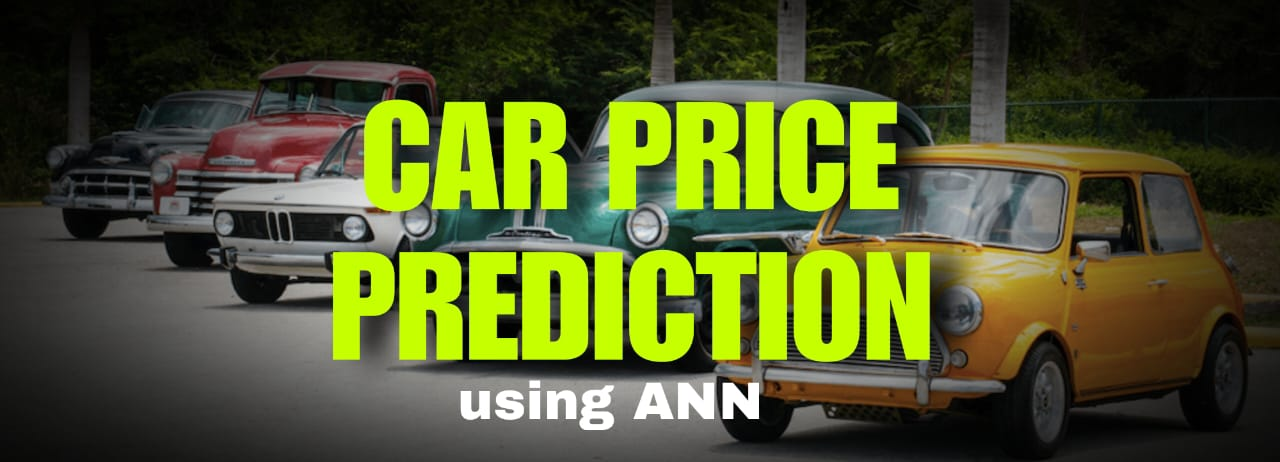

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [2]:
import os

# List files in the specified directory
print(os.listdir('/kaggle/input/ann-car-sales-price-prediction/'))


['car_purchasing.csv']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

**ISO-8859-1: This is a character encoding standard, also known as "Latin-1." It includes Western European characters and is commonly used to handle special characters like accents (é, ñ, ü, etc.) that may not be supported by the default utf-8 encoding.**

In [4]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


**No NULL value**

In [6]:
df.duplicated().sum()

0

# **PREPROCESSING**

**Fields like 'customer name' and 'customer e-mail' are unique identifiers and do not provide any information that would help predict a target variable, such as car purchasing price.**

**Including 'country' might lead to unintended bias if the model picks up patterns based solely on location rather than actual car purchasing behavior.**

**So i Drop This Column**

In [7]:
df.drop(columns=['customer name','customer e-mail','country'],inplace=True)

In [8]:
X = df.iloc[:, : -1] #each column except -1
y = df.iloc[:, -1] #only -1 column that is last column

In [9]:
X

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [10]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

# **SCALING**

**Scaling is essential in machine learning, especially for algorithms that rely on distance-based calculations, to ensure that each feature contributes equally to the model.**

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
y_df = y.to_frame()
y = scaler.fit_transform(y_df)

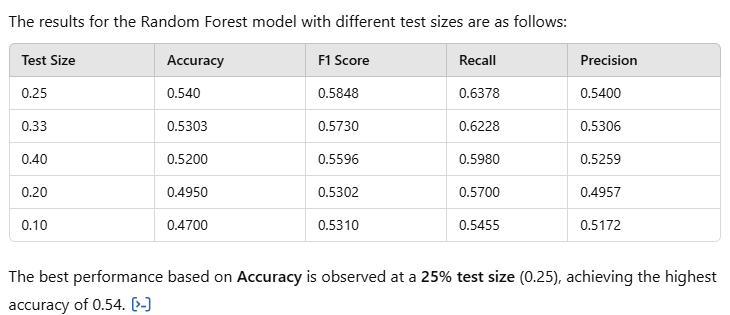

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **MODELING**

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

# **BUILD ANN MODEL**

In [15]:
model=Sequential([
    Dense(128,activation='relu',input_dim=5),#128: This specifies the number of neurons in this dense layer.
    Dense(64,activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1. Sequential()
The Sequential class in Keras represents a linear stack of layers, where each layer has exactly one input and one output. It's a straightforward way to build a neural network when the model is a simple stack of layers.

2. Dense(128, activation='relu', input_dim=5)
Dense: This is a fully connected layer. Each neuron in this layer is connected to every neuron in the previous layer.

128: The number of neurons in this layer. In this case, there are 128 neurons.

activation='relu': The ReLU (Rectified Linear Unit) activation function introduces non-linearity, enabling the model to learn more complex patterns. ReLU outputs max(0, x) for each input x, which means any negative values are replaced with zero.

input_dim=5: This defines the number of input features that the model expects. The first layer in the network needs to know the shape of the input, so input_dim=5 indicates that the input data will have 5 features.

3. Dense(64, activation='relu')

64: This specifies the number of neurons in this layer. It's a hidden layer that comes after the first one.

activation='relu': ReLU is again used as the activation function in this layer to introduce non-linearity and enable the network to learn complex relationships.

4. Dense(32, activation='relu')

32: This is the number of neurons in this layer.
activation='relu': The ReLU activation function is used again.

5. Dense(1, activation='linear')

1: This is the number of neurons in the final output layer. Since this is the last layer of the model, the number of neurons corresponds to the number of outputs. Here, it outputs a single value (often used for regression tasks).

activation='linear': The linear activation function is used here because, in regression problems, the model often outputs continuous values without any non-linearity. This means the network is directly outputting the value without any transformation.

# Summary of the Network:
The model consists of 4 layers in total: 3 hidden layers and 1 output layer.

The first hidden layer has 128 neurons, followed by a second hidden layer with 64 neurons, and a third hidden layer with 32 neurons. Each of these layers uses the ReLU activation function.

The output layer has a single neuron with a linear activation function, typically used for regression tasks to predict a continuous output.

# **COMPLIE THE ANN MODEL**

In [16]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.8079 - val_loss: 0.0693
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0341 - val_loss: 0.0125
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - val_loss: 0.0063
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5102e-04 - val_loss: 0.0016
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9867e-04 - val_loss: 0.0014
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0496e-04 - val_loss: 0.0020
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

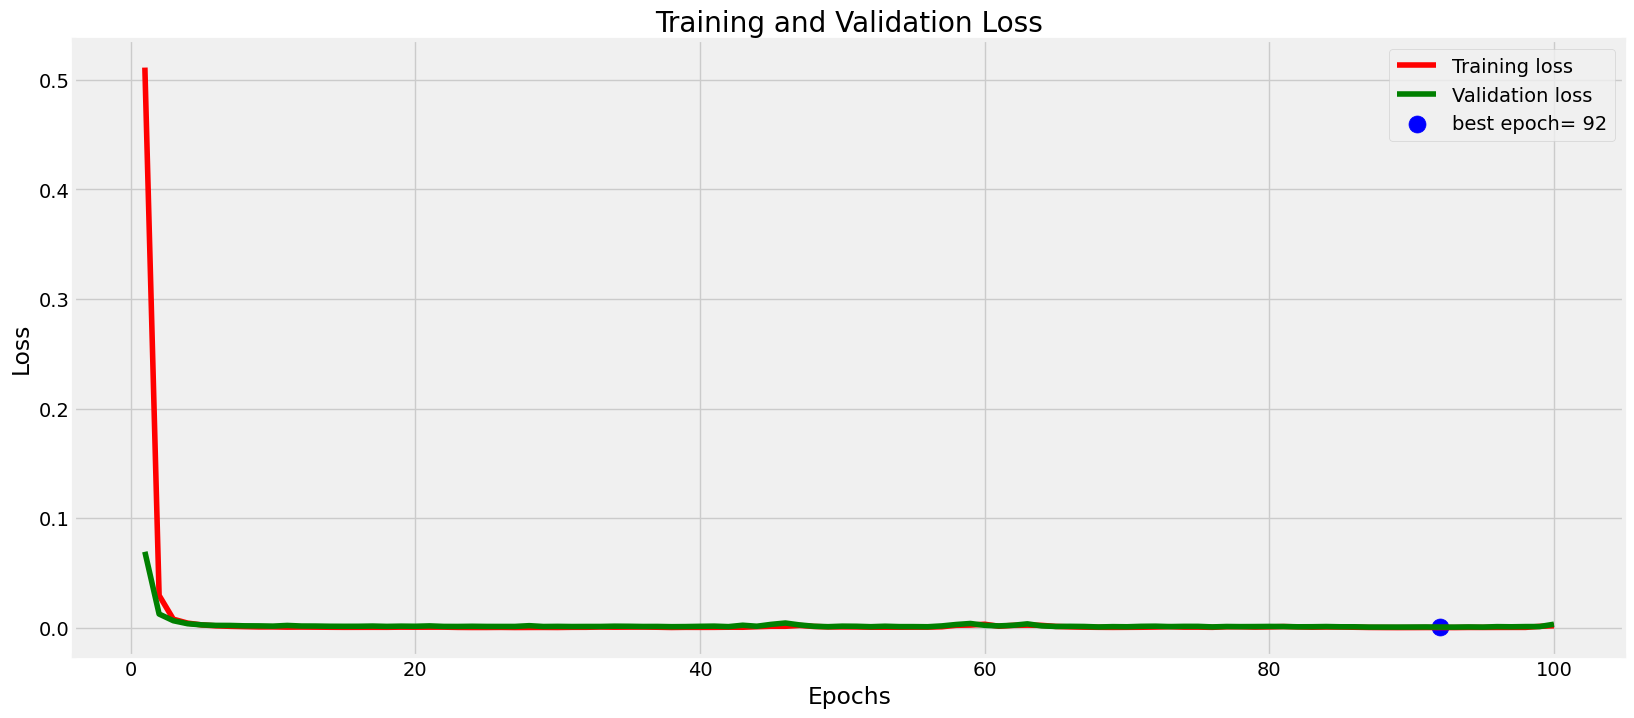

In [19]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score
import numpy as np
import pandas as pd

y_pred = model.predict(X_test)

R2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

metrics = {
    "Metric": ["R2 Score", "Mean Absolute Error (MAE)",
               "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "Mean Absolute Percentage Error (MAPE)", "Explained Variance Score"],
    "Score": [R2, mae, mse, rmse, mape, evs]
}

metrics_df = pd.DataFrame(metrics)

metrics_df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


,Metric,Score
0,R2 Score,0.996743
1,Mean Absolute Error (MAE),0.044518
2,Mean Squared Error (MSE),0.002988
3,Root Mean Squared Error (RMSE),0.054659
4,Mean Absolute Percentage Error (MAPE),0.209654
5,Explained Variance Score,0.998035


# Explanation:
R2 Score: Measures the proportion of variance in the dependent variable that is predictable from the independent variables. A score of 1 indicates perfect prediction, while a score of 0 means the model does no better than the mean of the data.

Mean Absolute Error (MAE): The average of the absolute errors between the predicted and actual values. Lower values indicate a better fit.

Mean Squared Error (MSE): The average of the squared differences between predicted and actual values. It penalizes larger errors more than MAE.

Root Mean Squared Error (RMSE): The square root of MSE, making it interpretable in the same units as the target variable. Like MSE, it penalizes large errors.

Mean Absolute Percentage Error (MAPE): The average absolute percentage difference between the predicted and actual values. It is useful for evaluating performance in percentage terms.

Explained Variance Score: Measures the proportion of variance explained by the model. A score of 1 means the model perfectly explains the variance in the data.

In [21]:
import pandas as pd

y_test_flat = y_test.flatten() if y_test.ndim > 1 else y_test #it flattens them to 1D
y_pred_flat = y_pred.flatten() if y_pred.ndim > 1 else y_pred

comparison_df = pd.DataFrame({
    'Actual': y_test_flat,
    'Predicted': y_pred_flat
})

print(comparison_df)


       Actual  Predicted
0    0.174033   0.225776
1    0.078895   0.086350
2    1.753330   1.799531
3   -1.149611  -1.078934
4    1.510020   1.557296
..        ...        ...
120  1.571087   1.594206
121 -0.273570  -0.286166
122  0.815254   0.858011
123 -1.199477  -1.212364
124  0.020713   0.011895

[125 rows x 2 columns]


# ! can This helpfull then UVOTE 🔺🔺🔺🔺🔺🔺🔺🔺🔺